In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium.plugins as plugins

In [4]:
full_fires_df = pd.read_csv('/Users/kaciewebster/Documents/dsi/ca-fire-incidents/California_Fire_Incidents.csv')
full_fires_df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [5]:
full_fires_df.shape

(1636, 40)

In [6]:
full_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [27]:
fires_df = full_fires_df[['AcresBurned', 'ArchiveYear', 'CalFireIncident', 'Counties', 'CrewsInvolved', 'Dozers', 'Engines', 'Fatalities', 'Helicopters', 'Injuries', 'Latitude', 'Longitude', 'MajorIncident', 'Name', 'SearchDescription', 'StructuresDamaged', 'StructuresDestroyed', 'StructuresThreatened']]
fires_df.head()
# df with columns I want

,AcresBurned,ArchiveYear,CalFireIncident,Counties,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,MajorIncident,Name,SearchDescription,StructuresDamaged,StructuresDestroyed,StructuresThreatened
0,257314.0,2013,True,Tuolumne,NaN,NaN,NaN,NaN,NaN,NaN,37.857000,-120.086000,False,Rim Fire,The Rim Fire was east of Groveland along Highw...,NaN,NaN,NaN
1,30274.0,2013,True,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,34.585595,-118.423176,False,Powerhouse Fire,The Powerhouse Fire burned in May and June 201...,NaN,NaN,NaN
2,27531.0,2013,True,Riverside,NaN,NaN,NaN,NaN,NaN,NaN,33.709500,-116.728850,False,Mountain Fire,The Mountain Fire burned in July 2013 off High...,NaN,NaN,NaN
3,27440.0,2013,False,Placer,NaN,NaN,NaN,NaN,NaN,NaN,39.120000,-120.650000,False,American Fire,The American Fire burned in August 2013 off De...,NaN,NaN,NaN
4,24251.0,2013,True,Ventura,47.0,8.0,117.0,NaN,11.0,10.0,0.000000,0.000000,True,Springs Fire,"The Springs Fire burned in May 2013, Southboun...",6.0,10.0,NaN


In [28]:
fires_df.shape

(1636, 18)

In [29]:
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   ArchiveYear           1636 non-null   int64  
 2   CalFireIncident       1636 non-null   bool   
 3   Counties              1636 non-null   object 
 4   CrewsInvolved         171 non-null    float64
 5   Dozers                123 non-null    float64
 6   Engines               191 non-null    float64
 7   Fatalities            21 non-null     float64
 8   Helicopters           84 non-null     float64
 9   Injuries              120 non-null    float64
 10  Latitude              1636 non-null   float64
 11  Longitude             1636 non-null   float64
 12  MajorIncident         1636 non-null   bool   
 13  Name                  1636 non-null   object 
 14  SearchDescription     1619 non-null   object 
 15  StructuresDamaged    

In [30]:
fires_df.describe()

,AcresBurned,ArchiveYear,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,StructuresDamaged,StructuresDestroyed,StructuresThreatened
count,1633.000000,1636.000000,171.000000,123.000000,191.000000,21.000000,84.000000,120.000000,1636.000000,1636.000000,67.000000,175.000000,30.000000
mean,4589.443968,2016.608802,11.561404,7.585366,23.565445,8.619048,5.357143,3.500000,37.203975,-108.082642,67.970149,271.788571,522.800000
std,27266.337722,1.845340,14.455633,14.028616,41.004424,18.529642,7.265437,3.806231,135.401380,37.006927,155.771975,1557.255963,739.586856
min,0.000000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-120.258000,-124.196290,0.000000,0.000000,0.000000
25%,35.000000,2015.000000,2.500000,1.000000,5.000000,1.000000,1.000000,1.000000,34.165890,-121.768358,1.000000,1.000000,0.000000
50%,100.000000,2017.000000,6.000000,2.000000,11.000000,3.000000,2.000000,3.000000,37.104065,-120.461560,6.000000,7.000000,45.000000
75%,422.000000,2018.000000,13.500000,5.000000,24.000000,6.000000,5.000000,4.000000,39.086808,-117.474072,49.500000,41.500000,1043.750000
max,410203.000000,2019.000000,82.000000,76.000000,256.000000,85.000000,29.000000,26.000000,5487.000000,118.908200,783.000000,18804.000000,2600.000000


In [31]:
no_nulls_acres = fires_df.dropna(axis=0, subset=['AcresBurned'])
no_nulls_acres.head()

,AcresBurned,ArchiveYear,CalFireIncident,Counties,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,MajorIncident,Name,SearchDescription,StructuresDamaged,StructuresDestroyed,StructuresThreatened
0,257314.0,2013,True,Tuolumne,NaN,NaN,NaN,NaN,NaN,NaN,37.857000,-120.086000,False,Rim Fire,The Rim Fire was east of Groveland along Highw...,NaN,NaN,NaN
1,30274.0,2013,True,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,34.585595,-118.423176,False,Powerhouse Fire,The Powerhouse Fire burned in May and June 201...,NaN,NaN,NaN
2,27531.0,2013,True,Riverside,NaN,NaN,NaN,NaN,NaN,NaN,33.709500,-116.728850,False,Mountain Fire,The Mountain Fire burned in July 2013 off High...,NaN,NaN,NaN
3,27440.0,2013,False,Placer,NaN,NaN,NaN,NaN,NaN,NaN,39.120000,-120.650000,False,American Fire,The American Fire burned in August 2013 off De...,NaN,NaN,NaN
4,24251.0,2013,True,Ventura,47.0,8.0,117.0,NaN,11.0,10.0,0.000000,0.000000,True,Springs Fire,"The Springs Fire burned in May 2013, Southboun...",6.0,10.0,NaN


In [32]:
no_nulls_acres.shape

(1633, 18)

In [33]:
no_nulls_acres.describe()

,AcresBurned,ArchiveYear,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,StructuresDamaged,StructuresDestroyed,StructuresThreatened
count,1633.000000,1633.000000,171.000000,123.000000,191.000000,21.000000,84.000000,120.000000,1633.000000,1633.000000,67.000000,175.000000,30.000000
mean,4589.443968,2016.604409,11.561404,7.585366,23.565445,8.619048,5.357143,3.500000,37.207695,-108.063693,67.970149,271.788571,522.800000
std,27266.337722,1.844183,14.455633,14.028616,41.004424,18.529642,7.265437,3.806231,135.525702,37.038134,155.771975,1557.255963,739.586856
min,0.000000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-120.258000,-124.196290,0.000000,0.000000,0.000000
25%,35.000000,2015.000000,2.500000,1.000000,5.000000,1.000000,1.000000,1.000000,34.169346,-121.768590,1.000000,1.000000,0.000000
50%,100.000000,2017.000000,6.000000,2.000000,11.000000,3.000000,2.000000,3.000000,37.106320,-120.462340,6.000000,7.000000,45.000000
75%,422.000000,2018.000000,13.500000,5.000000,24.000000,6.000000,5.000000,4.000000,39.088333,-117.478000,49.500000,41.500000,1043.750000
max,410203.000000,2019.000000,82.000000,76.000000,256.000000,85.000000,29.000000,26.000000,5487.000000,118.908200,783.000000,18804.000000,2600.000000


In [35]:
only_ca = no_nulls_acres[(no_nulls_acres['Latitude'] >= 32) & (no_nulls_acres['Latitude'] <= 42) & (no_nulls_acres['Longitude'] <= -114) & (no_nulls_acres['Longitude'] >= -126)]
only_ca.shape

(1462, 18)

In [36]:
m = folium.Map(location=[34.0522, -118.2437], zoom_start=5)

fire_arr = np.array(only_ca[['Latitude', 'Longitude']])

m.add_child(plugins.HeatMap(fire_arr, radius=17))
m

In [37]:
df_copy = only_ca.copy()
df_years_list = []
for year in df_copy['ArchiveYear'].sort_values().unique():
    df_years_list.append(df_copy.loc[df_copy['ArchiveYear']==year, ['Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())
# creates a list of lists where each element is a year and each element in that list element contains the latitudes and longitudes of each fire
    
m = folium.Map(location=[34.0522, -118.2437], zoom_start=5)
plugins.HeatMapWithTime(df_years_list, radius=5, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(m)
m

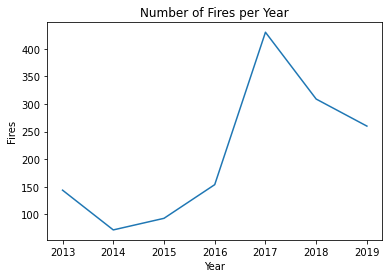

In [38]:
num_fires = only_ca.groupby('ArchiveYear')['AcresBurned'].count()
years = only_ca['ArchiveYear'].unique()

fig, ax = plt.subplots()
ax.plot(years, num_fires)
ax.set_title('Number of Fires per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Fires')

plt.show()

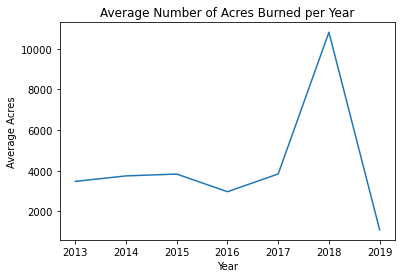

In [39]:
mean_acres = only_ca.groupby('ArchiveYear')['AcresBurned'].mean()
years = only_ca['ArchiveYear'].unique()

fig, ax = plt.subplots()
ax.plot(years, mean_acres)
ax.set_title('Average Number of Acres Burned per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Acres')

plt.show()

In [52]:
text_lst = list(only_ca['SearchDescription'].dropna())
months_dct = {'January':0, 'February':0, 'March':0, 'April':0, 'May':0, 'June':0, 'July':0, 'August':0, 'September':0, 'October':0, 'November':0, 'December':0}
for text in text_lst:
    for month in months_dct.keys():
        if month in text:
            months_dct[month] += 1
            break
            
months_dct
# make this into a function

{'January': 5,
 'February': 5,
 'March': 4,
 'April': 30,
 'May': 125,
 'June': 280,
 'July': 363,
 'August': 243,
 'September': 179,
 'October': 131,
 'November': 28,
 'December': 15}

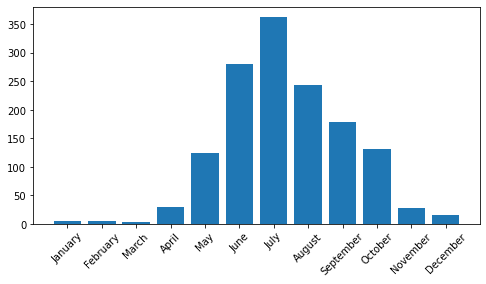

In [61]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(months_dct.keys(), height=months_dct.values())
plt.xticks(rotation=45)

plt.show()
# needs work

In [53]:
# make histogram of distributions
# maybe group by year?

Sources:
https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf